In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
face_cascade = cv2.CascadeClassifier('C:\\opencv\\build\\etc\\haarcascades\\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:\opencv\build\etc\haarcascades\haarcascade_eye.xml')

In [3]:
img = cv2.imread('james.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

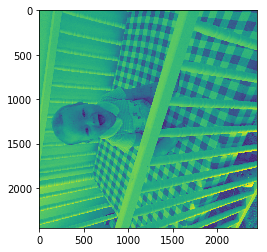

In [4]:
plt.imshow(gray)

In [56]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [5]:
'''
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey),(ex+ew, ey+eh),(0,255,0),2)
        
cv2.imshow('img', img)
cv2.waitKey(0)
'''

"\nfor (x,y,w,h) in faces:\n    img = cv2.rectangle(img,(x,y),(x+w,y+h), (255,0,0),2)\n    roi_gray = gray[y:y+h, x:x+w]\n    roi_color = img[y:y+h, x:x+w]\n    eyes = eye_cascade.detectMultiScale(roi_gray)\n    for (ex,ey,ew,eh) in eyes:\n        cv2.rectangle(roi_color, (ex,ey),(ex+ew, ey+eh),(0,255,0),2)\n        \ncv2.imshow('img', img)\ncv2.waitKey(0)\n"

In [6]:
# mouse as paintbrush
events = [i for i in dir(cv2) if 'EVENT' in i]
events

['EVENT_FLAG_ALTKEY',
 'EVENT_FLAG_CTRLKEY',
 'EVENT_FLAG_LBUTTON',
 'EVENT_FLAG_MBUTTON',
 'EVENT_FLAG_RBUTTON',
 'EVENT_FLAG_SHIFTKEY',
 'EVENT_LBUTTONDBLCLK',
 'EVENT_LBUTTONDOWN',
 'EVENT_LBUTTONUP',
 'EVENT_MBUTTONDBLCLK',
 'EVENT_MBUTTONDOWN',
 'EVENT_MBUTTONUP',
 'EVENT_MOUSEHWHEEL',
 'EVENT_MOUSEMOVE',
 'EVENT_MOUSEWHEEL',
 'EVENT_RBUTTONDBLCLK',
 'EVENT_RBUTTONDOWN',
 'EVENT_RBUTTONUP']

In [7]:
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img, (x,y),100,(255,255,0),-1)

In [8]:
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)

In [ ]:
while(1):
    cv2.imshow('image', img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()